In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

# Diabetes Dataset:
### Pregnancies: number of times the patient got pregnant
### Glucose: Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
### BloodPRessure: Diastolic Blood Pressure (mm Hg)
### SkinThickness: Triceps skin fold thickness (mm)
### Insulin: 2-Hour Serum insulin (µh/ml)
### BMI: Body mass index [weight in kg/(Height in m)]
### DiabetesPedigreeFunction
### Age
### Outcome: 0=non-diabetic 1=diabetic

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Mais um teste para verificar se há valores faltantes, especialmente nas colunas: Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [3]:
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
# Substituindo os valores faltantes na coluna de 0 por NaN com numpy

# Mostrando os valores nulos
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Visualizando os dados

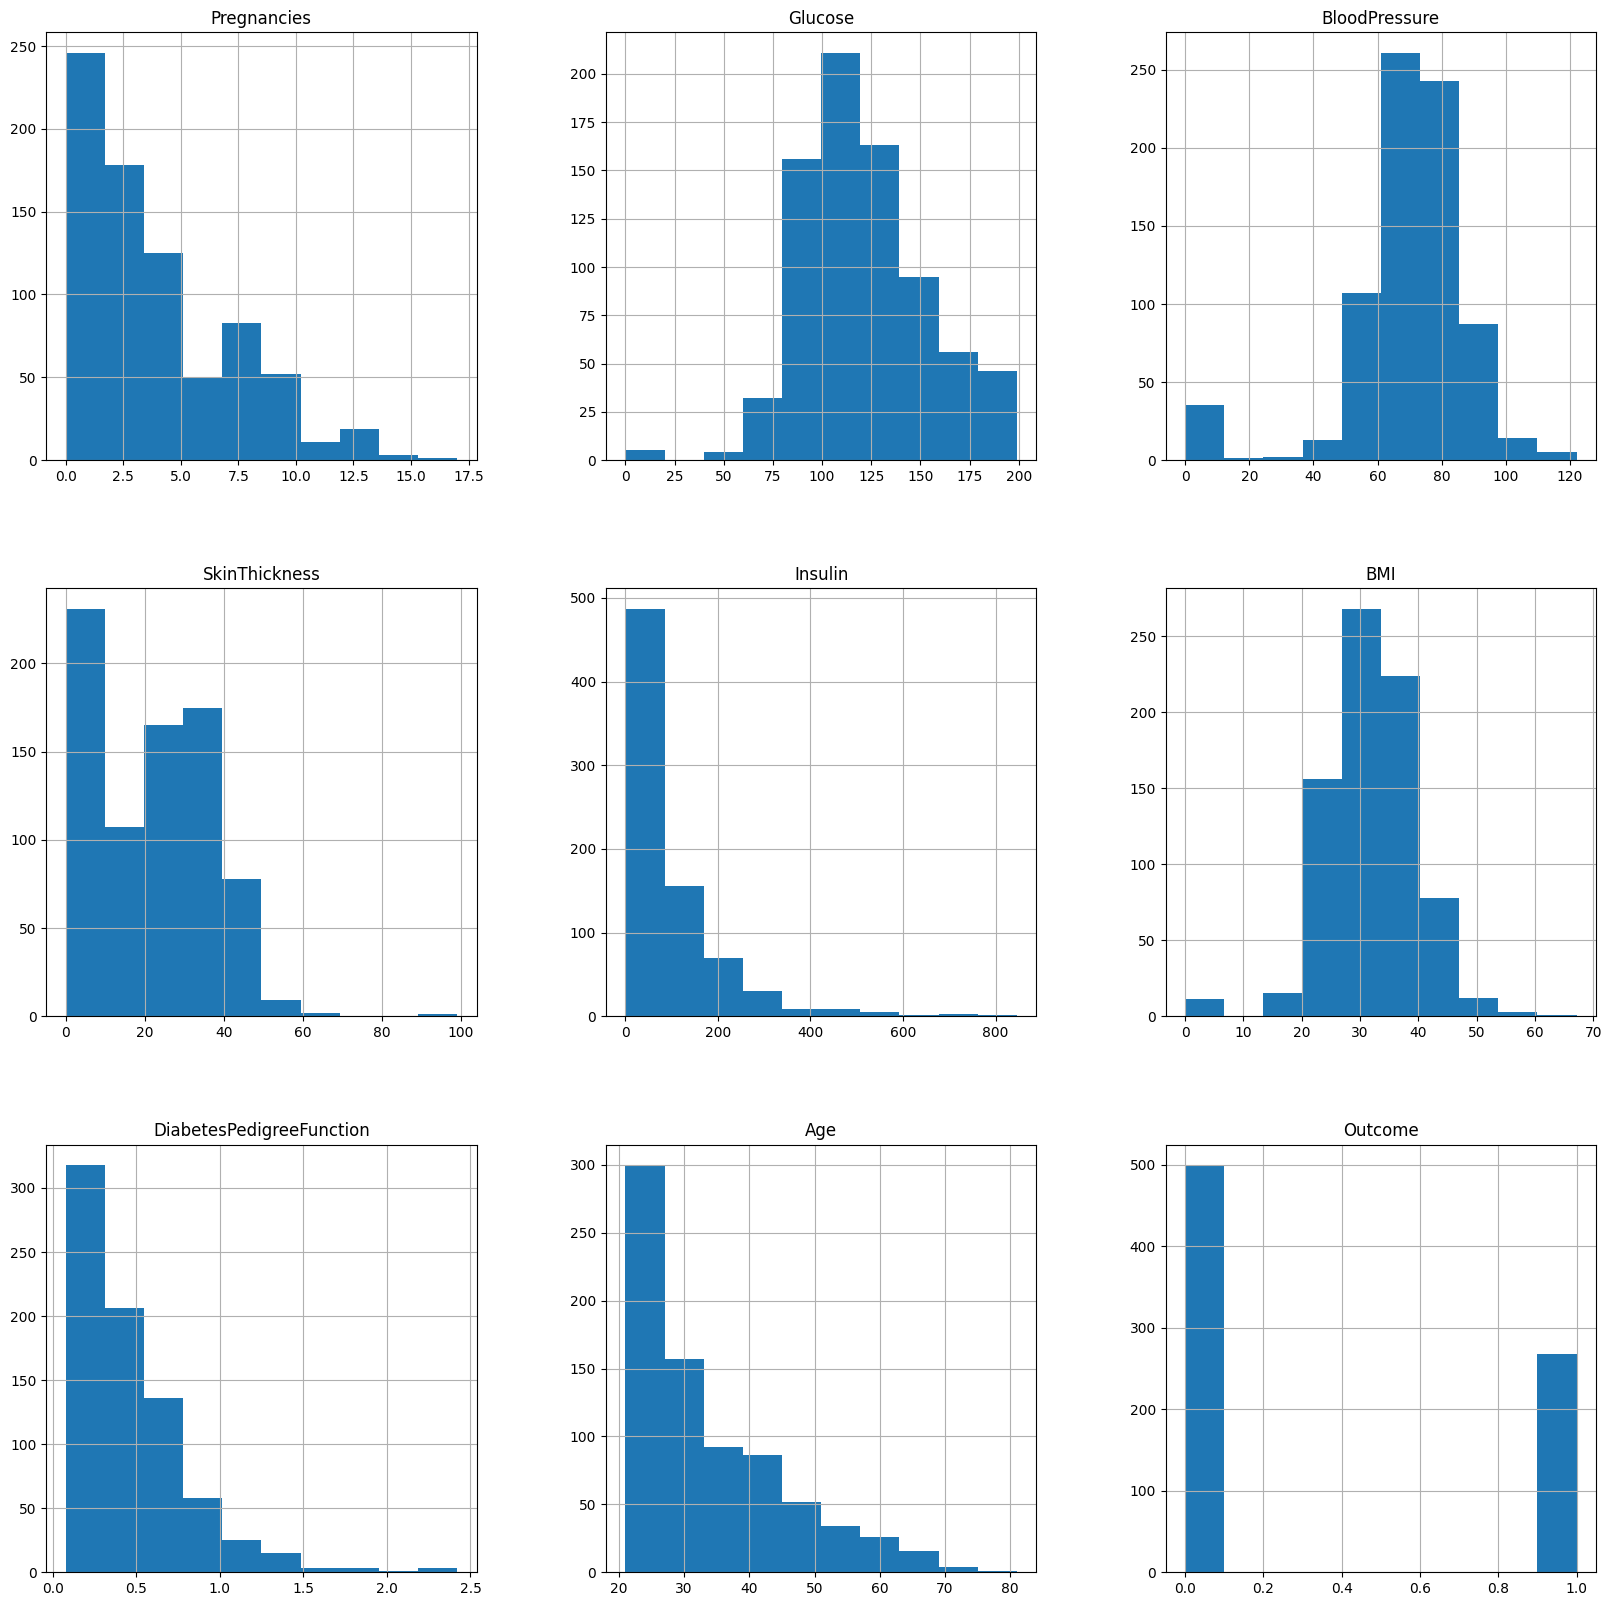

In [17]:
p = df.hist(figsize=(20,20))

## Preenchendo os valores nulos com a média ou mediana

In [4]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

## Plotando as distribuições depois de remover os valores nulos

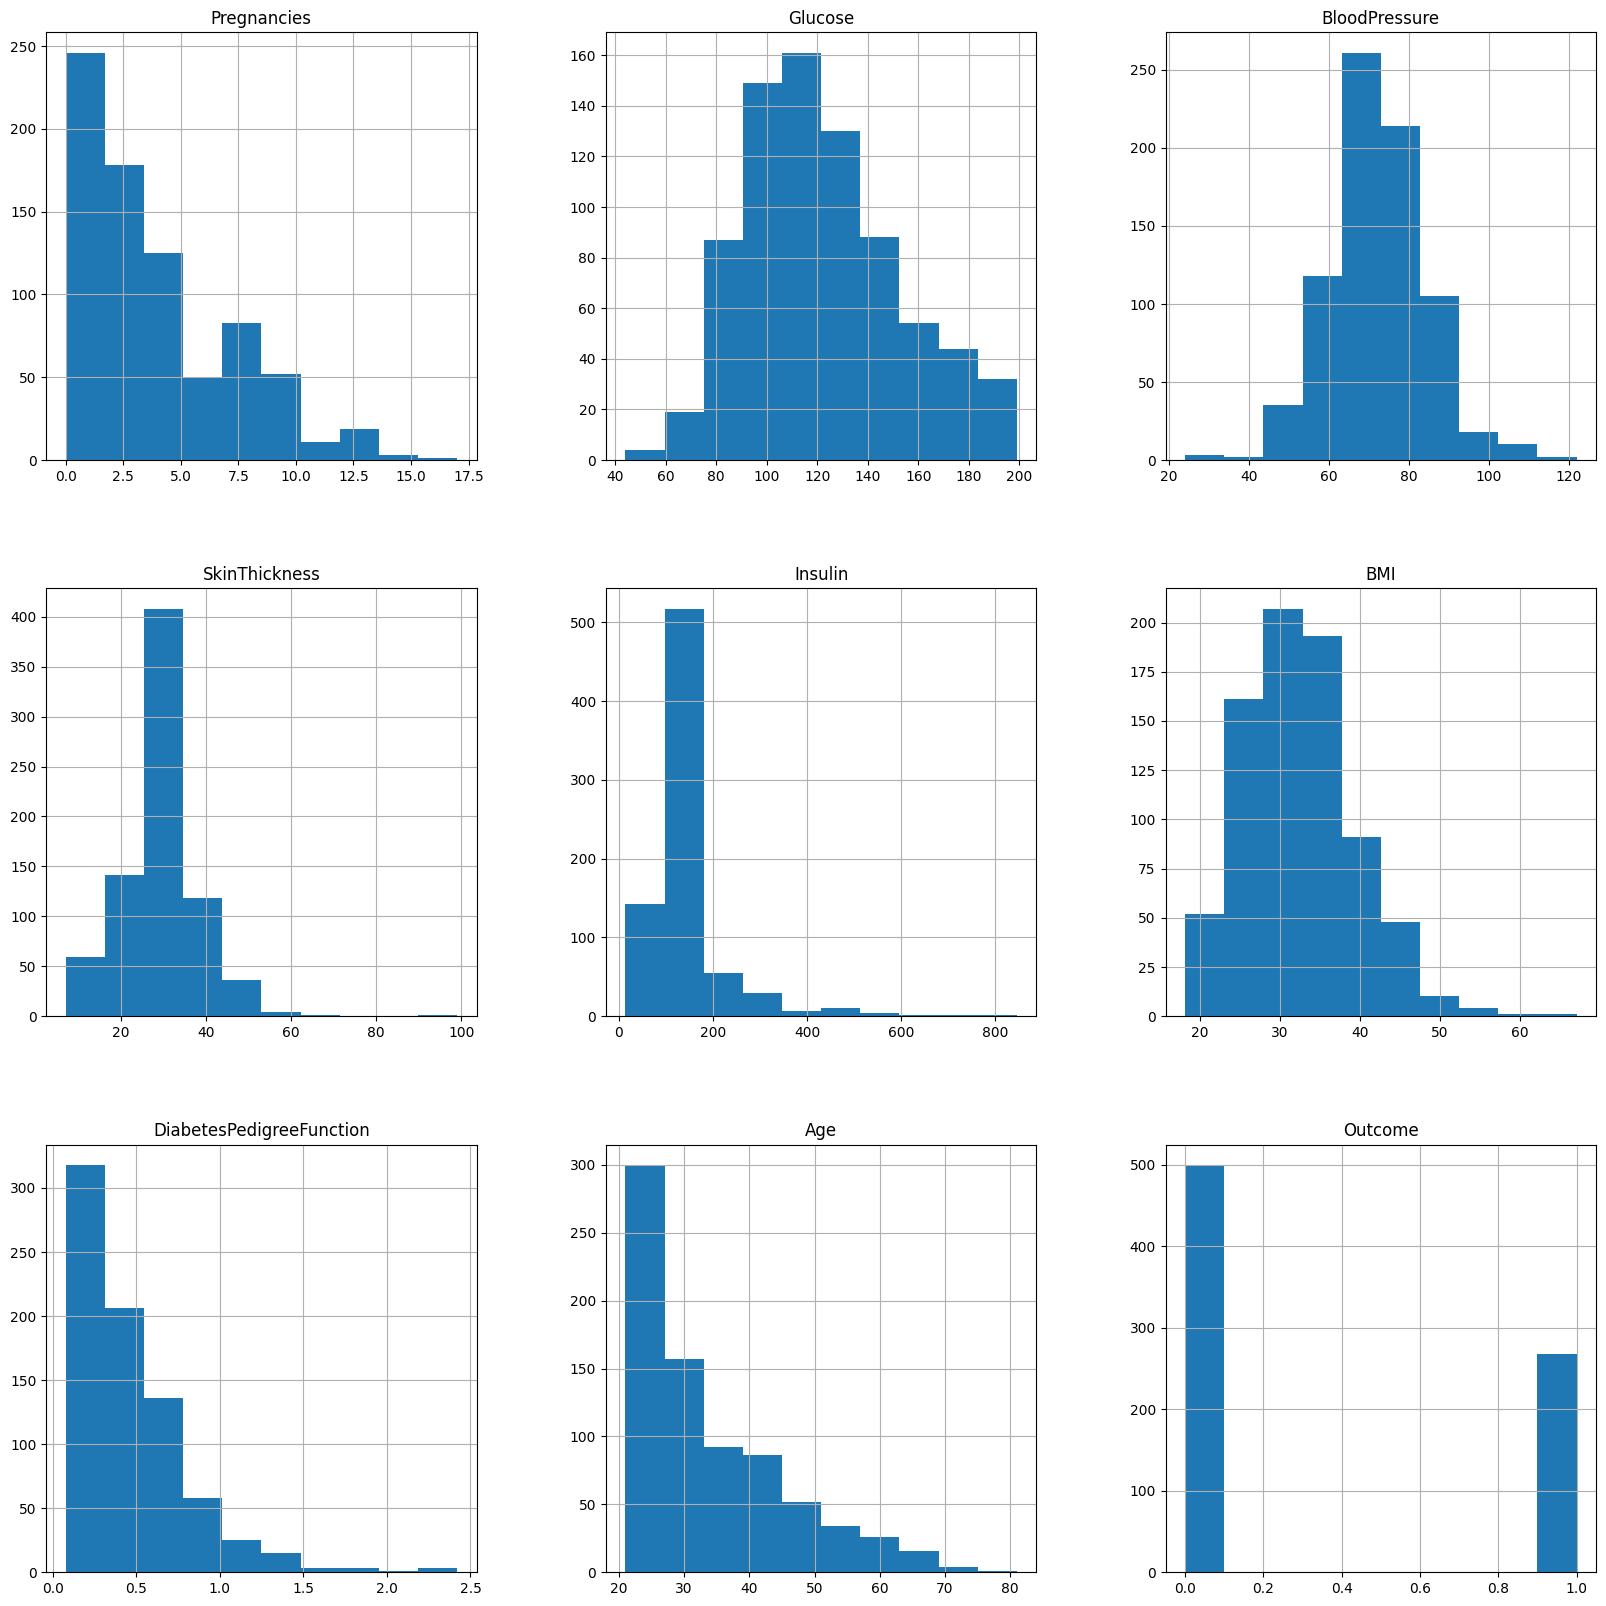

In [23]:
p = df_copy.hist(figsize=(20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


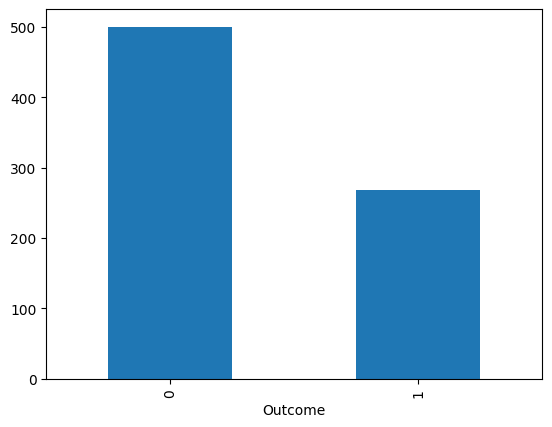

In [25]:
print(df.Outcome.value_counts())
relacao_diabeticos_naodiabeticos = df.Outcome.value_counts().plot(kind='bar')

## Criando um matriz de dispersão para ver a correlação entre dados

In [34]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Considerando que este dataset 'df' tem valores faltantes, as conclusões são as seguintes:
### Pelo visto, SkinThickness tem certa correlação com BMI;
### Pregnancies tem certa correlação com a idade (Age);

In [32]:
df_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


## Agora com os dados faltantes preenchidos
### Insulina tem uma correlação bem maior com Glicose
### SkinThickness tem uma correlação maior ainda com BMI

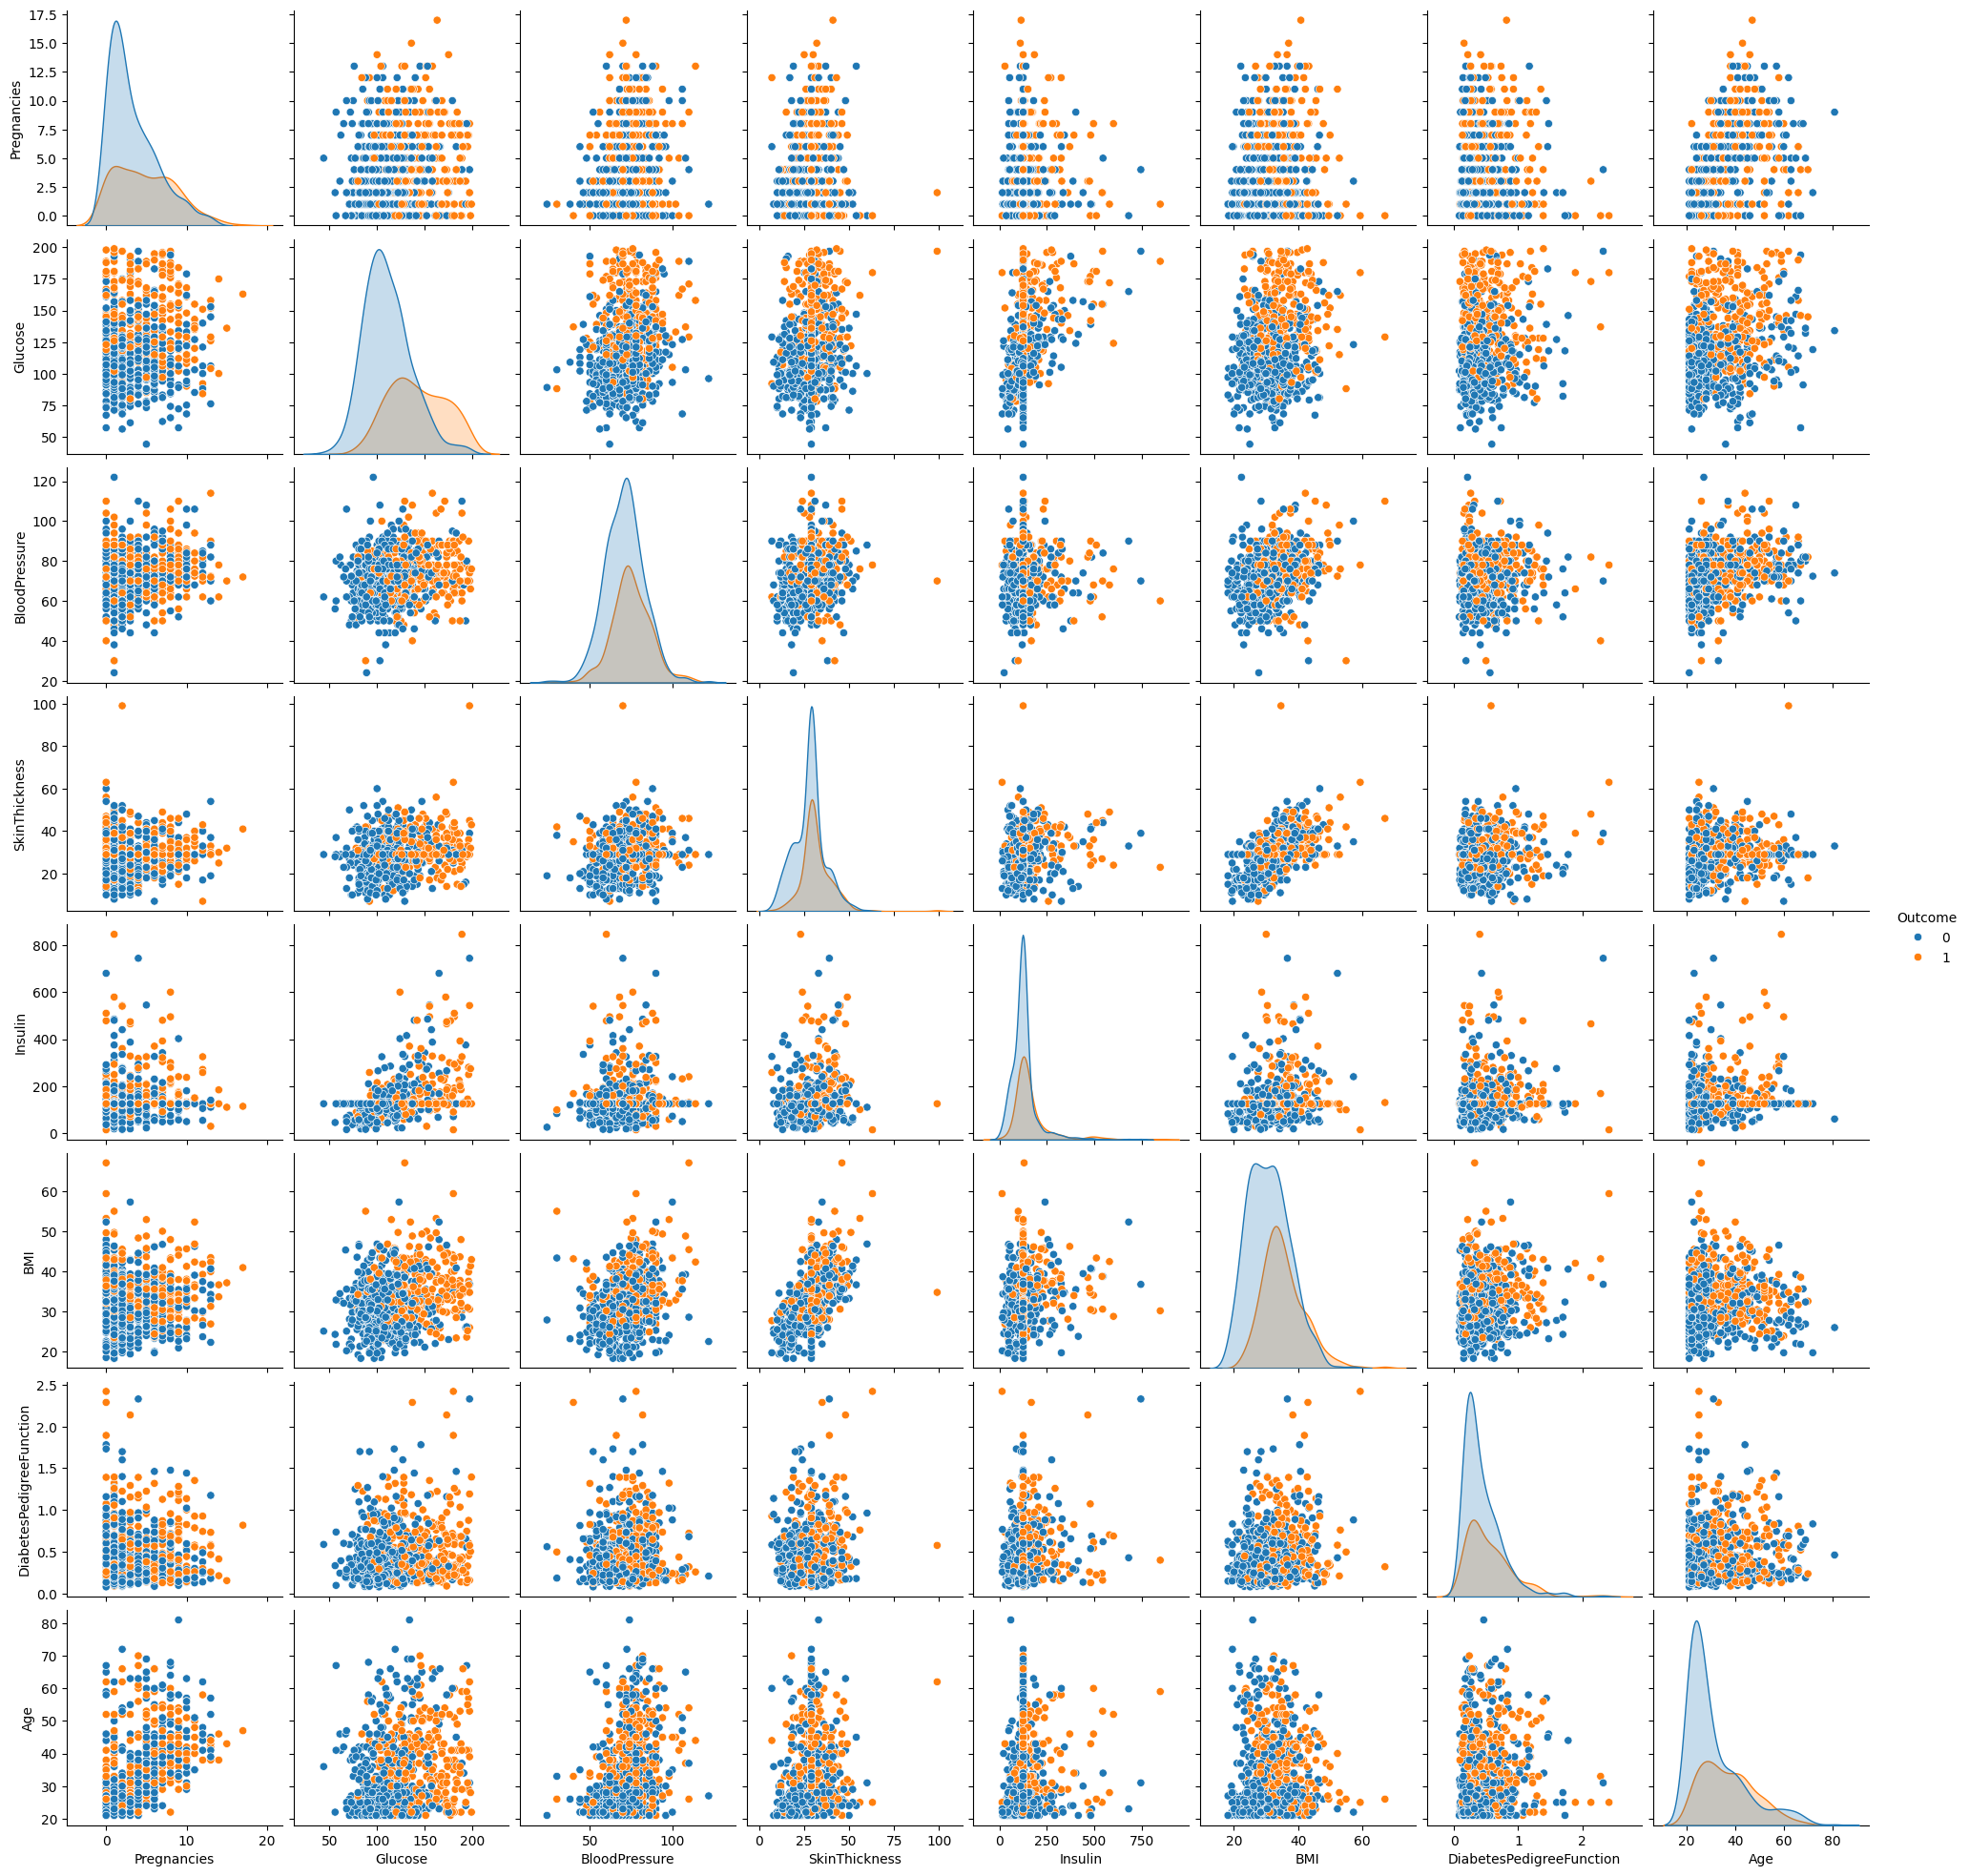

In [33]:
p = sns.pairplot(df_copy, hue='Outcome')

### Com base nesses plots, se o nível de Glicose for maior que 170, há grandes chances do paciente ser diabético

## Separando os valores de X e Y e escalonando dados

In [5]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_copy.drop(['Outcome'], axis=1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [6]:
y = df_copy.Outcome

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Construindo o modelo

In [41]:
test_scores = []
train_scores = []
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [42]:
train_scores

[1.0,
 0.8436482084690554,
 0.8403908794788274,
 0.8241042345276873,
 0.8338762214983714,
 0.8061889250814332,
 0.8159609120521173,
 0.8175895765472313,
 0.8241042345276873,
 0.8029315960912052,
 0.8094462540716613,
 0.7964169381107492,
 0.8029315960912052,
 0.7980456026058632]

In [43]:
test_scores

[0.7142857142857143,
 0.7272727272727273,
 0.7207792207792207,
 0.7337662337662337,
 0.7532467532467533,
 0.7402597402597403,
 0.7207792207792207,
 0.7337662337662337,
 0.7207792207792207,
 0.7402597402597403,
 0.7337662337662337,
 0.7402597402597403,
 0.7207792207792207,
 0.7337662337662337]

## Descobrindo o valor máximo obtido em train_scores e test_scores para selecionar o melhor número de 'neighbors'

In [44]:
max_train_score = max(train_scores)
max_train_score_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print(f'O maior valor obtido no treino foi {max_train_score*100}, k={max_train_score_index}')

O maior valor obtido no treino foi 100.0, k=[0]


In [45]:
max_test_score = max(test_scores)
max_test_score_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print(f'O maior valor obtido no teste foi {max_test_score*100}, k={max_test_score_index}')

O maior valor obtido no teste foi 75.32467532467533, k=[4]


In [53]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(X_test)

In [55]:
knn.score(X_test, y_test)

0.7532467532467533

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



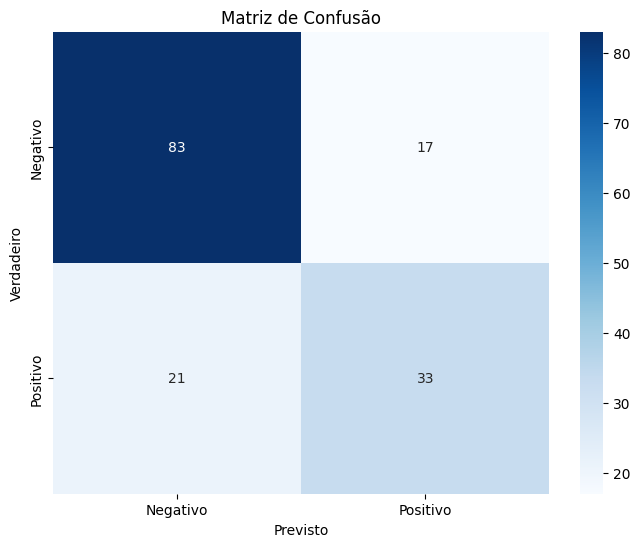

In [62]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### O modelo teve uma acurácia razoável de 75% considerando o dataset pequeno com apenas 700 linhas 
### O modelo apresenta uma acurácia razoável, mas tem dificuldade em identificar todos os casos de diabetes (baixa revocação)
### Acredito que com um dataset ainda maior, pode se ter um resultado ainda mais satisfatório